In [2]:
# ========== Basic Utilities ==========
import os
import sys
import random
import warnings
warnings.filterwarnings("ignore")

# ========== Data Handling ==========
import numpy as np
import pandas as pd

# ========== Data Visualization ==========
import matplotlib.pyplot as plt
import seaborn as sns

# Optional aesthetic setup
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# ========== Data Preprocessing ==========
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
    OneHotEncoder
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# ========== Machine Learning Models ==========
# Linear Models
from sklearn.linear_model import LinearRegression, LogisticRegression

# Tree-Based Models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    AdaBoostClassifier,
    AdaBoostRegressor
)

# Support Vector Machines
from sklearn.svm import SVC, SVR

# Neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Clustering
from sklearn.cluster import KMeans

# ========== Model Evaluation ==========
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import json, pickle 

In [3]:
df = pd.read_csv('F:\Courses\Fall 25\Software\Software Lab\Project\FitLab\AI\Dataset\Final_data.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [4]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [5]:
# Show all unique values in the 'Workout_Type' column
print("Unique Workout Types:")
print(df['Workout_Type'].unique())


Unique Workout Types:
['Strength' 'HIIT' 'Cardio' 'Yoga']


In [6]:
df.isnull().sum()


Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [8]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851454,73.898832,1.723094,179.889702,143.704306,62.195813,1.259446,1280.109601,26.101313,2.627486,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


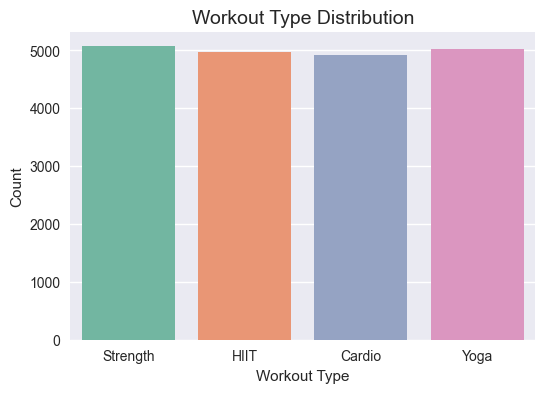

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Workout_Type', data=df, palette='Set2')
plt.title('Workout Type Distribution', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.show()


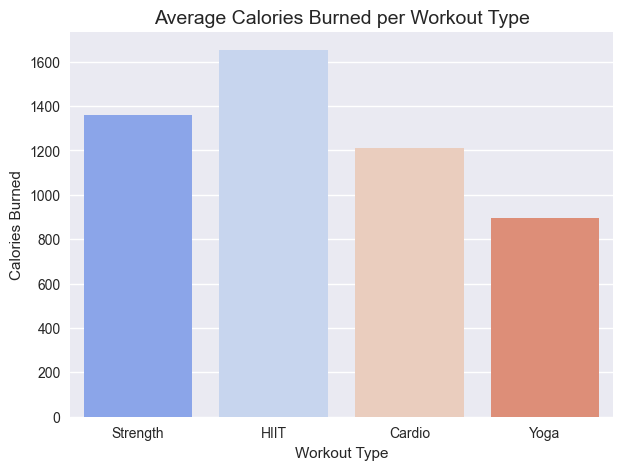

In [10]:
plt.figure(figsize=(7,5))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, palette='coolwarm', ci=None)
plt.title('Average Calories Burned per Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()


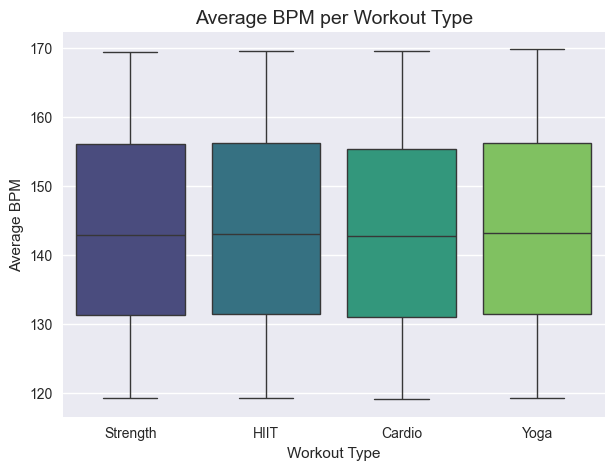

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Workout_Type', y='Avg_BPM', data=df, palette='viridis')
plt.title('Average BPM per Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Average BPM')
plt.show()


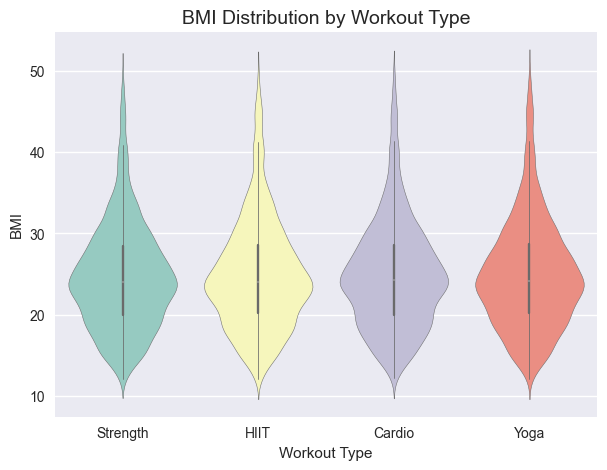

In [12]:
plt.figure(figsize=(7,5))
sns.violinplot(x='Workout_Type', y='BMI', data=df, palette='Set3')
plt.title('BMI Distribution by Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('BMI')
plt.show()


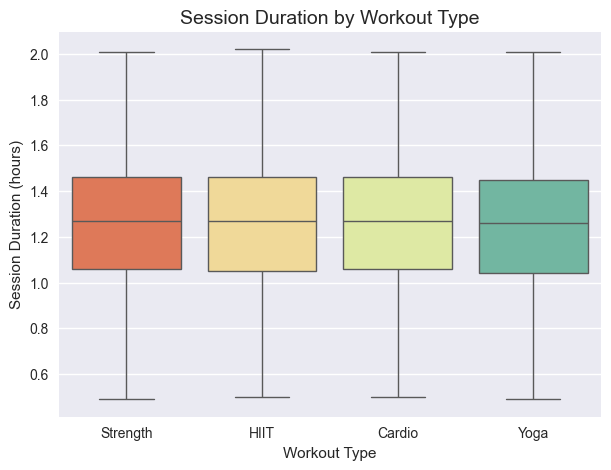

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Workout_Type', y='Session_Duration (hours)', data=df, palette='Spectral')
plt.title('Session Duration by Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Session Duration (hours)')
plt.show()


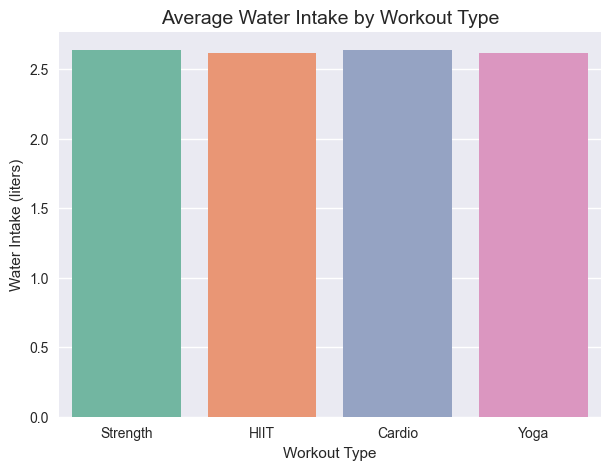

In [14]:
plt.figure(figsize=(7,5))
sns.barplot(x='Workout_Type', y='Water_Intake (liters)', data=df, palette='Set2', ci=None)
plt.title('Average Water Intake by Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Water Intake (liters)')
plt.show()


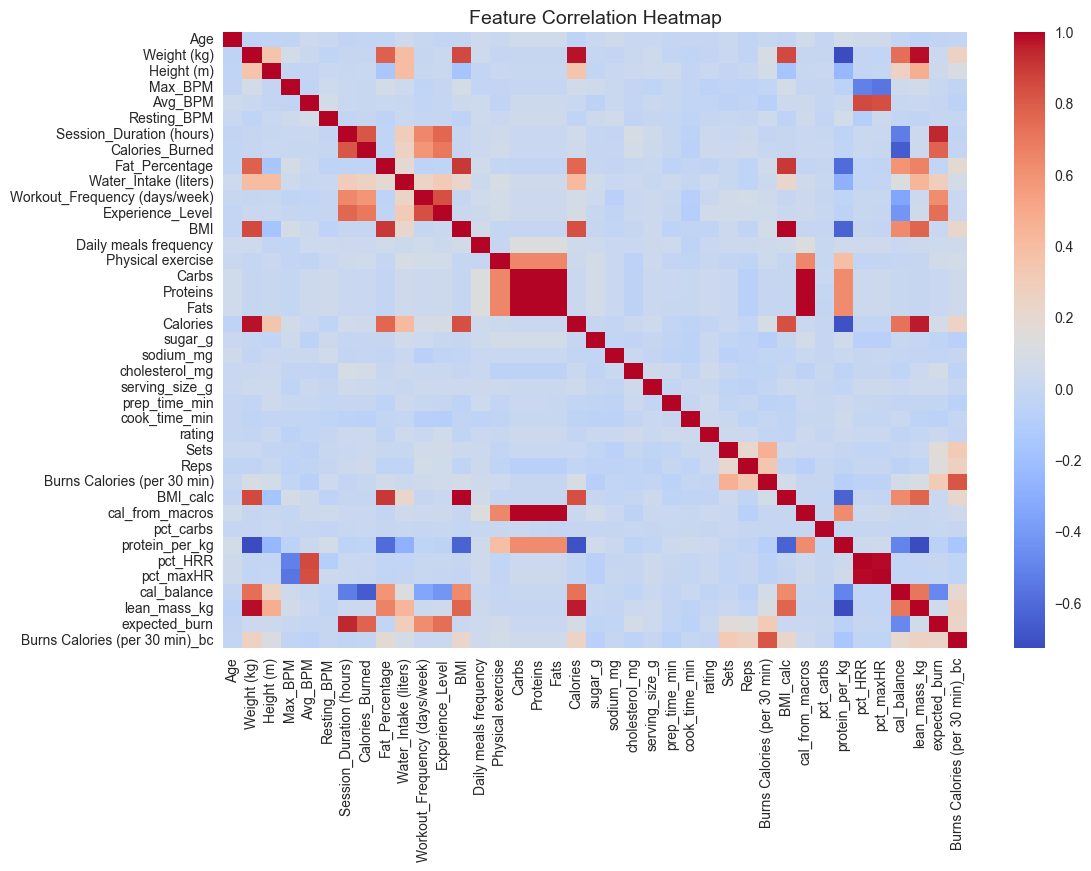

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()


In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)


Categorical Columns:
['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'Burns_Calories_Bin']

Numerical Columns:
['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min', 'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc']


In [17]:
# Display all unique exercise names
exercise_names = df['Name of Exercise'].unique()
print(f"Total unique exercises: {len(exercise_names)}\n")
print(exercise_names)


Total unique exercises: 55

['Decline Push-ups' 'Bear Crawls' 'Dips' 'Mountain Climbers' 'Bicep Curls'
 'Leg Press' 'Thrusters' 'Turkish Get-ups' 'Glute Bridges' 'Step-ups'
 'Plank' 'Pull-ups' 'Lunges' 'Plyo Squats' 'Squats' 'Frog Jumps'
 'Deadlifts' 'Prone Cobras' 'Lat Pulldowns' 'Russian Twists'
 'Shoulder Press' 'Tricep Dips' 'Kettlebell Swings'
 'Resistance Band Pull-Aparts' 'Leg Raises' 'Tricep Extensions'
 'Dead Bugs' 'Scissors Kicks' 'Plyometric Push-ups' 'Push Ups'
 'Bench Press' 'Inverted Rows' 'Seated Rows' 'Calf Raises'
 'Reverse Lunges' 'Deadlift' 'Wall Angels' 'Lateral Raises' 'Face Pulls'
 'Burpees' 'Push-ups' 'Box Jumps' 'Rows' 'Bird Dogs' 'Dragon Flags'
 'Bicycle Crunches' 'Flutter Kicks' 'Bulgarian Split Squats' 'Superman'
 'Incline Push-ups' 'Jumping Jacks' 'Renegade Rows' 'Windshield Wipers'
 'Zottman Curls' 'Pistol Squats']


In [19]:
# Loop through all columns and print unique values
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n🔹 Column: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals[:10]}")  # show only first 10 values



🔹 Column: Age
Unique values (3950): [34.91 23.37 33.2  38.69 45.09 53.19 23.17 55.92 24.11 39.19]

🔹 Column: Gender
Unique values (2): ['Male' 'Female']

🔹 Column: Weight (kg)
Unique values (7042): [ 65.27  56.41  58.98  93.78  52.42 105.05  58.41  84.07  88.58  50.32]

🔹 Column: Height (m)
Unique values (53): [1.62 1.55 1.67 1.7  1.88 1.84 1.78 1.63 1.79 1.6 ]

🔹 Column: Max_BPM
Unique values (3808): [188.58 179.43 175.04 191.21 193.58 176.52 184.75 183.87 176.78 166.88]

🔹 Column: Avg_BPM
Unique values (4801): [157.65 131.75 123.95 155.1  152.88 130.6  140.9  141.12 154.07 128.04]

🔹 Column: Resting_BPM
Unique values (1939): [69.05 73.18 54.96 50.07 70.84 61.84 58.01 51.79 65.19 49.91]

🔹 Column: Session_Duration (hours)
Unique values (154): [1.   1.37 0.91 1.1  1.08 0.69 1.67 1.01 1.76 1.17]

🔹 Column: Calories_Burned
Unique values (4587): [1080.9  1809.91  802.26 1450.79 1166.4   453.33 1953.9   727.81 2062.37
 1157.25]

🔹 Column: Workout_Type
Unique values (4): ['Strength' 'HIIT'

In [20]:
# Count unique values per column
unique_counts = df.nunique().sort_values()

# Display top 5 columns with least variety
print("🔹 Top 5 columns with the least unique values:\n")
print(unique_counts.head(5))


🔹 Top 5 columns with the least unique values:

meal_name             1
Gender                2
Difficulty Level      3
meal_type             4
Burns_Calories_Bin    4
dtype: int64


In [21]:
df = df.drop('meal_name', axis=1)
'meal_name' in df.columns

False

In [23]:
df = df.drop('Name of Exercise', axis=1)
'Name of Exercise' in df.columns

False

In [24]:
df = df.drop('Benefit', axis=1)
'Benefit' in df.columns

False

In [25]:
muscle_target = df['Target Muscle Group'].unique()
print(f"Total unique targets: {len(exercise_names)}\n")
print(muscle_target)


Total unique targets: 55

['Shoulders, Triceps' 'Back, Core, Shoulders' 'Quadriceps, Glutes'
 'Biceps, Forearms' 'Chest, Triceps' 'Core, Obliques' 'Core'
 'Back, Biceps' 'Upper Chest, Triceps' 'Core, Lower Back'
 'Lower Chest, Triceps' 'Core, Shoulders, Hips'
 'Rear Deltoids, Upper Back' 'Quadriceps, Hamstrings, Glutes'
 'Core, Shoulders, Legs' 'Shoulders, Upper Back'
 'Chest, Triceps, Shoulders' 'Triceps' 'Obliques, Core' 'Full Body'
 'Glutes, Hamstrings' 'Quadriceps, Calves, Glutes' 'Lower Abs'
 'Legs, Shoulders, Core' 'Shoulders' 'Upper Back, Rear Deltoids' 'Calves'
 'Glutes, Hamstrings, Core' 'Triceps, Chest' 'Back, Hamstrings, Glutes'
 'Lower Back, Glutes' 'Lower Abs, Hip Flexors'
 'Full Body, Core, Shoulders' 'Full Core' 'Quadriceps' 'Legs, Core']


In [26]:
# Keep only the first muscle listed in each row
df['Target Muscle Group'] = df['Target Muscle Group'].apply(lambda x: x.split(',')[0].strip())
df['Target Muscle Group'].unique()[:10]


array(['Shoulders', 'Back', 'Quadriceps', 'Biceps', 'Chest', 'Core',
       'Upper Chest', 'Lower Chest', 'Rear Deltoids', 'Triceps'],
      dtype=object)

In [30]:
# Categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns
num_categorical = len(categorical_cols)

# Numerical columns (int or float)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_numerical = len(numerical_cols)

print(f"Number of categorical columns: {num_categorical}")
print(f"Number of numerical columns: {num_numerical}")


Number of categorical columns: 12
Number of numerical columns: 39


In [32]:
# Select categorical/object columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Display first 5 rows for these columns
df[categorical_cols].head(10)


,Gender,Workout_Type,meal_type,diet_type,cooking_method,Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,Burns_Calories_Bin
0,Male,Strength,Lunch,Vegan,Grilled,Shoulders,Cable Machine,Advanced,Legs,Lats,Dumbbell flyes,Medium
1,Female,HIIT,Lunch,Vegetarian,Fried,Back,Step or Box,Intermediate,Chest,Lats,Lateral raises,High
2,Female,Cardio,Breakfast,Paleo,Boiled,Quadriceps,Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises,High
3,Female,HIIT,Lunch,Paleo,Fried,Biceps,Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes,High
4,Male,Strength,Breakfast,Vegan,Baked,Chest,Wall,Advanced,Abs,Wrist Flexors,Military press,Low
5,Female,Yoga,Snack,Keto,Steamed,Core,Resistance Band or Cable Machine,Beginner,Arms,Wrist Flexors,Skull crushers,Very High
6,Male,Strength,Breakfast,Low-Carb,Fried,Core,None or Dumbbells,Advanced,Shoulders,Wrist Flexors,Barbell rows,Low
7,Female,Yoga,Snack,Low-Carb,Raw,Back,Pull-up Bar,Intermediate,Back,Lower,Hammer curl,Very High
8,Female,Strength,Lunch,Vegan,Boiled,Upper Chest,Barbell,Beginner,Chest,Middle,Russian twists,High
9,Female,Strength,Lunch,Paleo,Grilled,Core,Low Bar or TRX,Intermediate,Forearms,Lower Chest,Towel pull-up,Low


In [35]:
df = df.drop('Equipment Needed', axis=1)
'Equipment Needed' in df.columns

False

In [36]:
# Select categorical/object columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Display first 5 rows for these columns
df[categorical_cols].head(10)


,Gender,Workout_Type,meal_type,diet_type,cooking_method,Target Muscle Group,Difficulty Level,Body Part,Type of Muscle,Workout,Burns_Calories_Bin
0,Male,Strength,Lunch,Vegan,Grilled,Shoulders,Advanced,Legs,Lats,Dumbbell flyes,Medium
1,Female,HIIT,Lunch,Vegetarian,Fried,Back,Intermediate,Chest,Lats,Lateral raises,High
2,Female,Cardio,Breakfast,Paleo,Boiled,Quadriceps,Intermediate,Arms,Grip Strength,Standing calf raises,High
3,Female,HIIT,Lunch,Paleo,Fried,Biceps,Advanced,Shoulders,Upper,Incline dumbbell flyes,High
4,Male,Strength,Breakfast,Vegan,Baked,Chest,Advanced,Abs,Wrist Flexors,Military press,Low
5,Female,Yoga,Snack,Keto,Steamed,Core,Beginner,Arms,Wrist Flexors,Skull crushers,Very High
6,Male,Strength,Breakfast,Low-Carb,Fried,Core,Advanced,Shoulders,Wrist Flexors,Barbell rows,Low
7,Female,Yoga,Snack,Low-Carb,Raw,Back,Intermediate,Back,Lower,Hammer curl,Very High
8,Female,Strength,Lunch,Vegan,Boiled,Upper Chest,Beginner,Chest,Middle,Russian twists,High
9,Female,Strength,Lunch,Paleo,Grilled,Core,Intermediate,Forearms,Lower Chest,Towel pull-up,Low


In [38]:
unique_workouts = df['Workout'].unique()
print(f"Unique Workout Types ({len(unique_workouts)}): {unique_workouts}")


Unique Workout Types (53): ['Dumbbell flyes' 'Lateral raises' 'Standing calf raises'
 'Incline dumbbell flyes' 'Military press' 'Skull crushers' 'Barbell rows'
 'Hammer curl' 'Russian twists' 'Towel pull-up' 'Bicep Curls' 'Face pulls'
 'Seated calf raises' 'Fat grip dumbbell curl' 'Hammer curls'
 'Plate pinch' 'Donkey kicks' 'Decline dumbbell press' 'Barbell curls'
 'Dumbbell front raises' 'Hyperextensions' 'Leg raises' 'Bicycle crunches'
 'Close-grip bench press' 'Decline cable crossovers' 'Hanging leg raises'
 'Bird dog' 'Dumbbell rows' 'Incline dumbbell press'
 'Bent-over lateral raises' 'Leg extensions' 'Pull-ups' 'Crunches'
 'Chest flyes' 'Decline dumbbell flyes' 'Dumbbell curls' 'Barbell squats'
 'Leg curls' 'Triceps dips' 'Concentration curls' 'Wrist extension'
 'Preacher curls' 'Incline cable crossovers' 'Barbell hip thrusts'
 'Cable crossovers' 'Romanian deadlifts' 'Triceps pushdowns'
 'Bent-over rows' 'Seated cable rows' 'Leg press' 'Plank' 'Wrist curl'
 'Overhead triceps ext

In [39]:
df = df.drop('Workout', axis=1)
'Workout' in df.columns

False

In [40]:
# Select categorical/object columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Display first 5 rows for these columns
df[categorical_cols].head(10)


,Gender,Workout_Type,meal_type,diet_type,cooking_method,Target Muscle Group,Difficulty Level,Body Part,Type of Muscle,Burns_Calories_Bin
0,Male,Strength,Lunch,Vegan,Grilled,Shoulders,Advanced,Legs,Lats,Medium
1,Female,HIIT,Lunch,Vegetarian,Fried,Back,Intermediate,Chest,Lats,High
2,Female,Cardio,Breakfast,Paleo,Boiled,Quadriceps,Intermediate,Arms,Grip Strength,High
3,Female,HIIT,Lunch,Paleo,Fried,Biceps,Advanced,Shoulders,Upper,High
4,Male,Strength,Breakfast,Vegan,Baked,Chest,Advanced,Abs,Wrist Flexors,Low
5,Female,Yoga,Snack,Keto,Steamed,Core,Beginner,Arms,Wrist Flexors,Very High
6,Male,Strength,Breakfast,Low-Carb,Fried,Core,Advanced,Shoulders,Wrist Flexors,Low
7,Female,Yoga,Snack,Low-Carb,Raw,Back,Intermediate,Back,Lower,Very High
8,Female,Strength,Lunch,Vegan,Boiled,Upper Chest,Beginner,Chest,Middle,High
9,Female,Strength,Lunch,Paleo,Grilled,Core,Intermediate,Forearms,Lower Chest,Low


In [41]:
from sklearn.preprocessing import LabelEncoder

# 1️⃣ One-Hot Encoding
one_hot_cols = ['Gender', 'Workout_Type', 'meal_type', 'diet_type', 
                'cooking_method', 'Target Muscle Group', 'Body Part', 'Type of Muscle']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# 2️⃣ Label Encoding
label_cols = ['Difficulty Level', 'Burns_Calories_Bin']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [42]:
# Categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns
num_categorical = len(categorical_cols)

# Numerical columns (int or float)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_numerical = len(numerical_cols)

print(f"Number of categorical columns: {num_categorical}")
print(f"Number of numerical columns: {num_numerical}")


Number of categorical columns: 0
Number of numerical columns: 41


In [44]:
df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,Type of Muscle_Lats,Type of Muscle_Lower,Type of Muscle_Lower Chest,Type of Muscle_Middle,Type of Muscle_Posterior,Type of Muscle_Quads,Type of Muscle_Triceps,Type of Muscle_Upper,Type of Muscle_Wrist Extensors,Type of Muscle_Wrist Flexors
0,34.91,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,26.800377,1.50,...,True,False,False,False,False,False,False,False,False,False
1,23.37,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,27.655021,1.90,...,True,False,False,False,False,False,False,False,False,False
2,33.20,58.98,1.67,175.04,123.95,54.96,0.91,802.26,24.320821,1.88,...,False,False,False,False,False,False,False,False,False,False
3,38.69,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,32.813572,2.50,...,False,False,False,False,False,False,False,True,False,False
4,45.09,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,17.307319,2.91,...,False,False,False,False,False,False,False,False,False,True


In [45]:
df.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise',
       'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min',
       'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)',
       'Difficulty Level', 'BMI_calc', 'cal_from_macros', 'pct_carbs',
       'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg',
       'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin',
       'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga', 'meal_type_Dinner', 'meal_type_Lunch',
       'meal_type_Snack', 'diet_type_Keto', 'diet_type_Low-Carb',
       'diet_type_Paleo', 'diet_type_Vegan', 'diet_type_Ve

In [46]:
import numpy as np

def reconstruct_workout_type(row):
    if row['Workout_Type_HIIT'] == 1:
        return 'HIIT'
    elif row['Workout_Type_Strength'] == 1:
        return 'Strength'
    elif row['Workout_Type_Yoga'] == 1:
        return 'Yoga'
    else:
        return 'Cardio'  # implied if all 0

df['Workout_Type_Label'] = df.apply(reconstruct_workout_type, axis=1)

# Then label encode
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
df['Workout_Type_Label'] = le_target.fit_transform(df['Workout_Type_Label'])

print("Label encoding mapping:", dict(zip(le_target.classes_, le_target.transform(le_target.classes_))))


Label encoding mapping: {'Cardio': np.int64(0), 'HIIT': np.int64(1), 'Strength': np.int64(2), 'Yoga': np.int64(3)}


In [47]:
df = df.drop(columns=['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga'])


In [49]:
df.shape

(20000, 93)

In [48]:
df.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise',
       'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min',
       'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)',
       'Difficulty Level', 'BMI_calc', 'cal_from_macros', 'pct_carbs',
       'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg',
       'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin',
       'Gender_Male', 'meal_type_Dinner', 'meal_type_Lunch', 'meal_type_Snack',
       'diet_type_Keto', 'diet_type_Low-Carb', 'diet_type_Paleo',
       'diet_type_Vegan', 'diet_type_Vegetarian', 'cooking_method_Boiled',
       'cooking_method_Fried', 'cookin

In [50]:
unique_values = df['Workout_Type_Label'].unique()
print(f"Unique values ({len(unique_values)}): {unique_values}")


Unique values (4): [2 1 0 3]


In [51]:
# Show the mapping of numbers to original workout types
mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
print(mapping)


{'Cardio': np.int64(0), 'HIIT': np.int64(1), 'Strength': np.int64(2), 'Yoga': np.int64(3)}


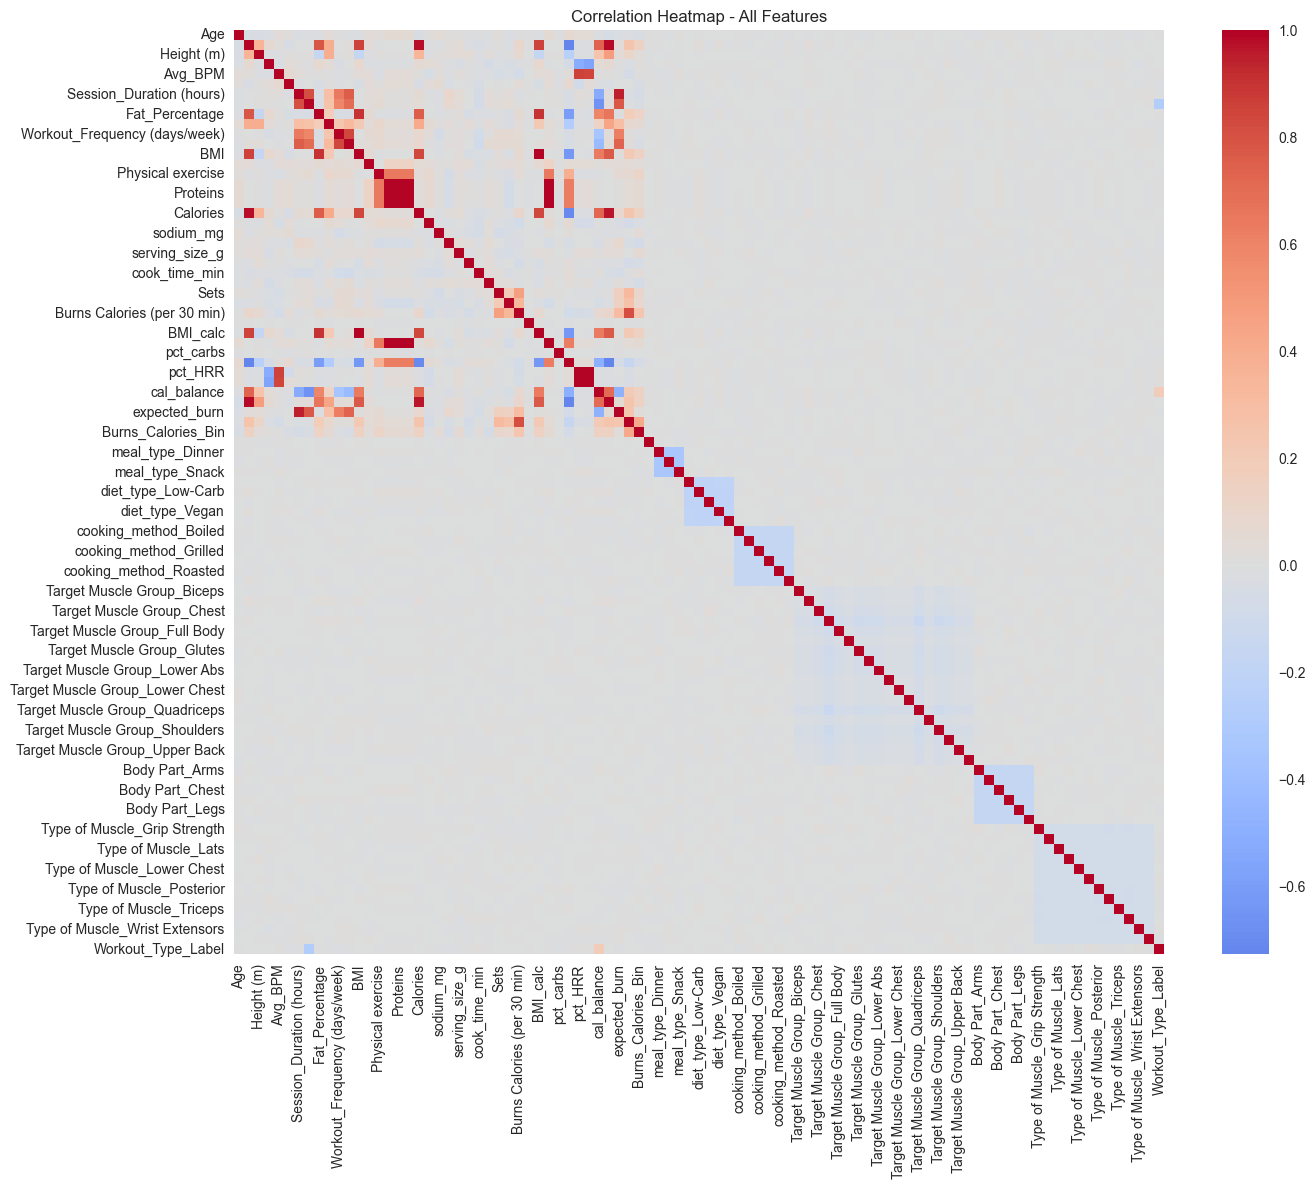

Top 10 positively correlated features with Workout_Type_Label:
cal_balance                        0.192513
pct_HRR                            0.014985
Avg_BPM                            0.014882
Body Part_Chest                    0.014477
pct_maxHR                          0.013099
cooking_method_Grilled             0.013058
Target Muscle Group_Full Core      0.012510
Type of Muscle_Wrist Extensors     0.012258
Target Muscle Group_Upper Chest    0.012207
cook_time_min                      0.010179
Name: Workout_Type_Label, dtype: float64

Top 10 negatively correlated features with Workout_Type_Label:
Type of Muscle_Quads            -0.010403
Session_Duration (hours)        -0.010853
Gender_Male                     -0.010995
Workout_Frequency (days/week)   -0.012438
pct_carbs                       -0.012625
Resting_BPM                     -0.012984
Target Muscle Group_Lower Abs   -0.013384
Body Part_Legs                  -0.013463
cholesterol_mg                  -0.014670
Calories_Burne

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation for all numeric columns
corr_matrix = df.corr(numeric_only=True)

# Correlation of all features with the target
target_corr = corr_matrix['Workout_Type_Label'].sort_values(ascending=False)
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap - All Features")
plt.show()
# Exclude the target itself
top_features = target_corr.drop('Workout_Type_Label').sort_values(ascending=False)

# Top 10 positive correlations
print("Top 10 positively correlated features with Workout_Type_Label:")
print(top_features.head(10))

# Top 10 negative correlations
print("\nTop 10 negatively correlated features with Workout_Type_Label:")
print(top_features.tail(10))


In [53]:
df.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise',
       'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min',
       'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)',
       'Difficulty Level', 'BMI_calc', 'cal_from_macros', 'pct_carbs',
       'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg',
       'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin',
       'Gender_Male', 'meal_type_Dinner', 'meal_type_Lunch', 'meal_type_Snack',
       'diet_type_Keto', 'diet_type_Low-Carb', 'diet_type_Paleo',
       'diet_type_Vegan', 'diet_type_Vegetarian', 'cooking_method_Boiled',
       'cooking_method_Fried', 'cookin

In [54]:
practical_input_cols = [
    'Age',
    'Gender_Male',
    'Weight (kg)',
    'Height (m)',
    'BMI',
    'Workout_Frequency (days/week)',
    'Experience_Level',
    'Body Part_Chest',
    'Body Part_Back',
    'Body Part_Arms',
    'Body Part_Legs',
    'Body Part_Shoulders'
]

# Check data types
for col in practical_input_cols:
    print(f"{col}: {df[col].dtype}")


Age: float64
Gender_Male: bool
Weight (kg): float64
Height (m): float64
BMI: float64
Workout_Frequency (days/week): float64
Experience_Level: float64
Body Part_Chest: bool
Body Part_Back: bool
Body Part_Arms: bool
Body Part_Legs: bool
Body Part_Shoulders: bool


In [55]:
bool_cols = ['Gender_Male','Body Part_Chest','Body Part_Back','Body Part_Arms','Body Part_Legs','Body Part_Shoulders']
df[bool_cols] = df[bool_cols].astype(int)


In [56]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age','Weight (kg)','Height (m)','BMI','Workout_Frequency (days/week)']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [57]:
X = df[practical_input_cols]
y = df['Workout_Type_Label']  # target


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))


Train accuracy: 1.0
Test accuracy: 0.25475


In [59]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,           # limit tree depth
    max_features='sqrt',   # use subset of features per split
    random_state=42
)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,           # limits tree depth to reduce overfitting
    max_features='sqrt',   # random subset of features per split
    random_state=42
)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


Train Accuracy: 0.346
Test Accuracy: 0.266


In [62]:
from sklearn.preprocessing import StandardScaler

# 1️⃣ Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude target column from normalization
numeric_cols = [col for col in numeric_cols if col != 'Workout_Type_Label']

# 2️⃣ Initialize scaler
scaler = StandardScaler()

# 3️⃣ Fit & transform numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 4️⃣ Optional: check the first few rows
df[numeric_cols].head()

# 5️⃣ Save scaler for deployment (user input normalization)
import joblib
joblib.dump(scaler, 'full_dataset_scaler.pkl')


['full_dataset_scaler.pkl']

In [63]:
# Features
X = df.drop(columns=['Workout_Type_Label'])

# Target
y = df['Workout_Type_Label']


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [65]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,  # limit depth to reduce overfitting
    random_state=42
)

# Train
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
# Accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


Train Accuracy: 0.880
Test Accuracy: 0.754


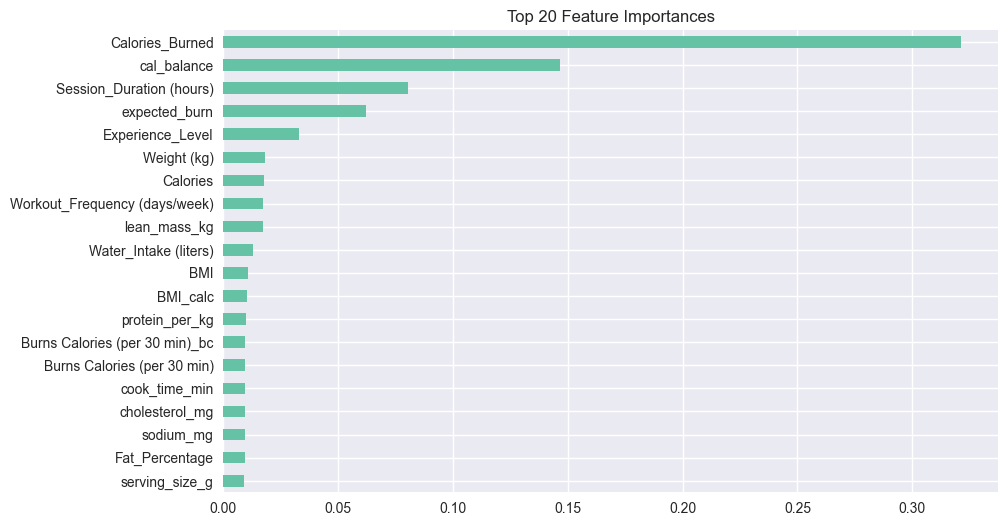

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).head(20)  # top 20 features

# Plot
plt.figure(figsize=(10,6))
feature_importances.sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.show()


In [68]:
import pandas as pd

# Get feature importances from the trained model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort and select top 20
top_20_features = feature_importances.sort_values(ascending=False).head(20).index.tolist()
print("Top 20 features:", top_20_features)


Top 20 features: ['Calories_Burned', 'cal_balance', 'Session_Duration (hours)', 'expected_burn', 'Experience_Level', 'Weight (kg)', 'Calories', 'Workout_Frequency (days/week)', 'lean_mass_kg', 'Water_Intake (liters)', 'BMI', 'BMI_calc', 'protein_per_kg', 'Burns Calories (per 30 min)_bc', 'Burns Calories (per 30 min)', 'cook_time_min', 'cholesterol_mg', 'sodium_mg', 'Fat_Percentage', 'serving_size_g']


In [69]:
X_top = X[top_20_features]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.ensemble import RandomForestClassifier

model_top = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,  # limit depth to reduce overfitting
    random_state=42
)

model_top.fit(X_train, y_train)
train_acc = model_top.score(X_train, y_train)
test_acc = model_top.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


Train Accuracy: 0.990
Test Accuracy: 0.953


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Use top 20 features
X_top = X[top_20_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                  # 3-fold cross-validation
    n_jobs=-1,             # use all cores
    verbose=2,
    scoring='accuracy'
)

# Fit
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
train_acc = best_model.score(X_train, y_train)
test_acc = best_model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

# Save best model
import joblib
joblib.dump(best_model, 'workout_model_top20_tuned.pkl')


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Accuracy: 1.000
Test Accuracy: 0.999


['workout_model_top20_tuned.pkl']

Classification Report:

              precision    recall  f1-score   support

      Cardio       1.00      1.00      1.00       985
        HIIT       1.00      1.00      1.00       995
    Strength       1.00      1.00      1.00      1014
        Yoga       1.00      1.00      1.00      1006

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



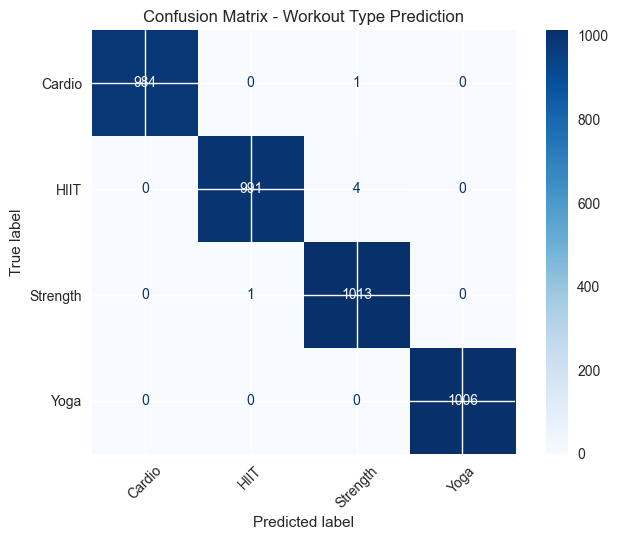

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_pred = best_model.predict(X_test)

# 1️⃣ Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# 2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - Workout Type Prediction")
plt.show()


Classification Report:

              precision    recall  f1-score   support

      Cardio       1.00      1.00      1.00       985
        HIIT       1.00      1.00      1.00       995
    Strength       1.00      1.00      1.00      1014
        Yoga       1.00      1.00      1.00      1006

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



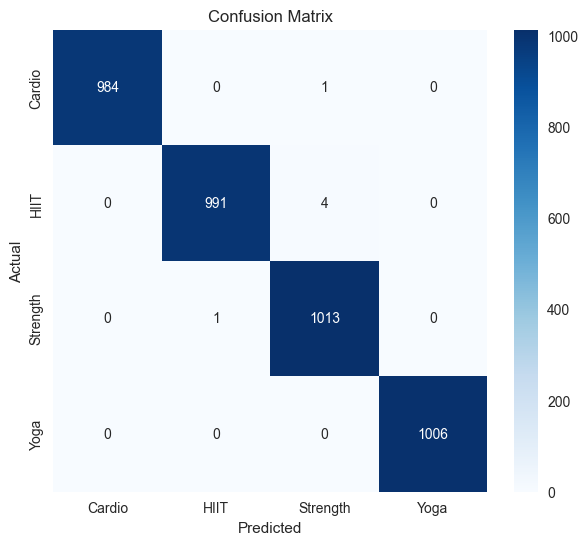

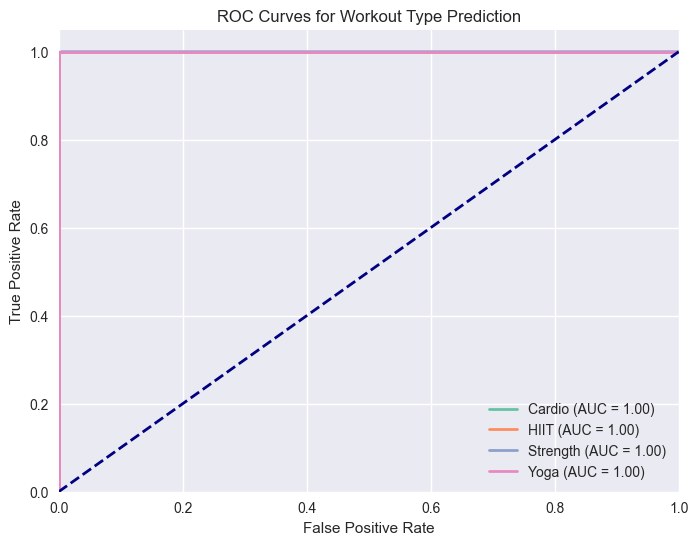

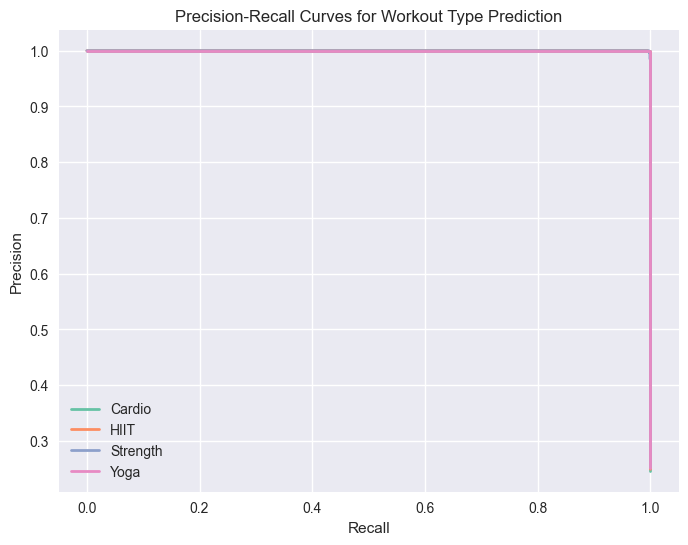

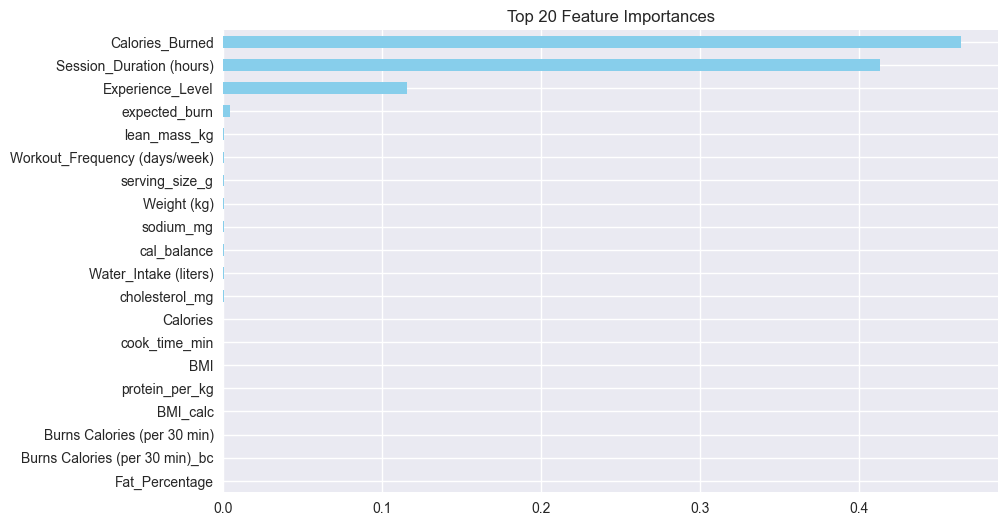

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# -----------------------------
# Predictions
# -----------------------------
y_pred = best_model.predict(X_test)
y_score = best_model.predict_proba(X_test)

# -----------------------------
# 1️⃣ Classification Report
# -----------------------------
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# -----------------------------
# 2️⃣ Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# 3️⃣ ROC Curves (One-vs-Rest)
# -----------------------------
n_classes = len(le_target.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{le_target.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Workout Type Prediction')
plt.legend(loc="lower right")
plt.show()

# -----------------------------
# 4️⃣ Precision-Recall Curves (One-vs-Rest)
# -----------------------------
plt.figure(figsize=(8,6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'{le_target.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Workout Type Prediction')
plt.legend(loc="lower left")
plt.show()

# -----------------------------
# 5️⃣ Feature Importance
# -----------------------------
importances = pd.Series(best_model.feature_importances_, index=top_20_features)
plt.figure(figsize=(10,6))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importances")
plt.show()


In [82]:
# If during training you did this:
# 0 = Cardio, 1 = HIIT, 2 = Strength, 3 = Yoga
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
le_target.classes_ = np.array(['Cardio', 'HIIT', 'Strength', 'Yoga'])

# Save it
joblib.dump(le_target, r"F:\Courses\Fall 25\Software\Software Lab\Project\FitLab\AI\target_label_encoder.pkl")


['F:\\Courses\\Fall 25\\Software\\Software Lab\\Project\\FitLab\\AI\\target_label_encoder.pkl']